### <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

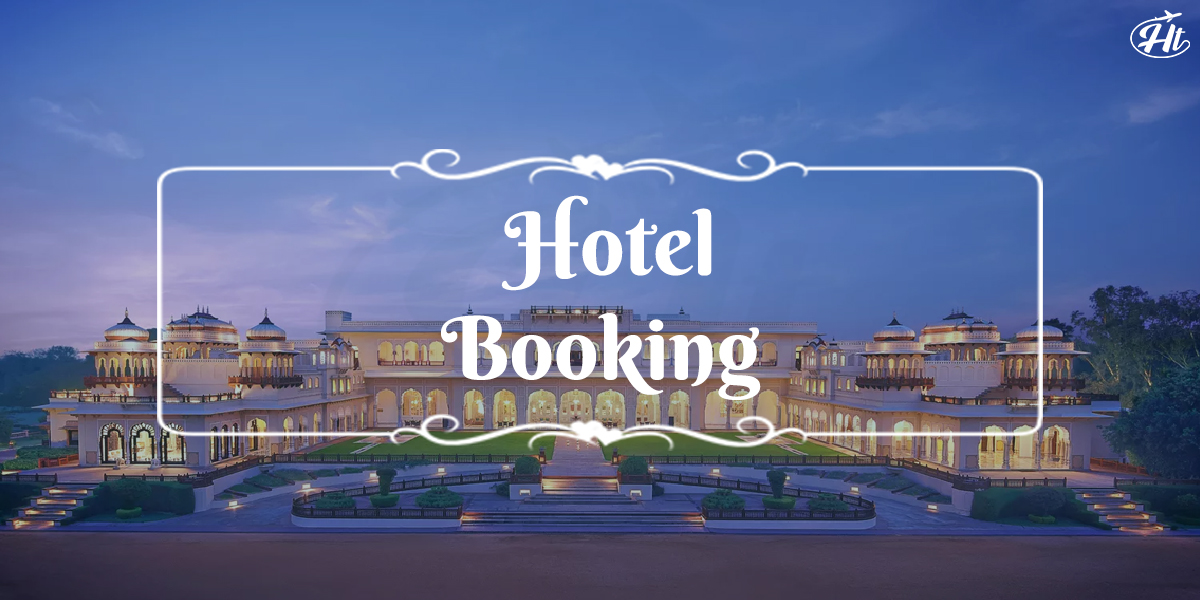

## **Loading the data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
from datetime import date
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Data/Capstone Project Data/Hotel Bookings.csv')


# **Understanding the data**

In [ ]:
# Printing all the columns
df.head().T

,0,1,2,3,4
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0
lead_time,342,737,7,13,14
arrival_date_year,2015,2015,2015,2015,2015
arrival_date_month,July,July,July,July,July
arrival_date_week_number,27,27,27,27,27
arrival_date_day_of_month,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0
stays_in_week_nights,0,0,1,1,2
adults,2,2,1,1,2


In [ ]:
df.shape

(119390, 32)

In [ ]:
# Finding the information regarding the null values and datatypes of all the columns in our dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# Finding the count of null values in all the columns of our dataset.
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

### Here we have  a lot of Null values in columns 'company' and 'agent' which highly impact our further analysis of data so we will remove these two columns for our further analysis.

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## **Cleaning the Data**

> by dropping values which don't seem relevant for our study.

*  arrival_date_week_number, arrival_date_day_of_month,company, previous_cancellations, previous_bookings_not_canceled and agent

In [ ]:
df.drop(['arrival_date_week_number','arrival_date_day_of_month','company','agent','previous_cancellations','previous_bookings_not_canceled','reservation_status_date'], axis=1, inplace=True)

In [ ]:
df.head().T

,0,1,2,3,4
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0
lead_time,342,737,7,13,14
arrival_date_year,2015,2015,2015,2015,2015
arrival_date_month,July,July,July,July,July
stays_in_weekend_nights,0,0,0,0,0
stays_in_week_nights,0,0,1,1,2
adults,2,2,1,1,2
children,0.0,0.0,0.0,0.0,0.0
babies,0,0,0,0,0


In [ ]:
# Finding the count of null values in remaining columns.
df.isna().sum()

hotel                            0
is_canceled                      0
lead_time                        0
arrival_date_year                0
arrival_date_month               0
stays_in_weekend_nights          0
stays_in_week_nights             0
adults                           0
children                         4
babies                           0
meal                             0
country                        488
market_segment                   0
distribution_channel             0
is_repeated_guest                0
reserved_room_type               0
assigned_room_type               0
booking_changes                  0
deposit_type                     0
days_in_waiting_list             0
customer_type                    0
adr                              0
required_car_parking_spaces      0
total_of_special_requests        0
reservation_status               0
dtype: int64

### To further clean the data if the numerical value in a column is null and if the count of the null is nominal we can upload it to the median value.
Here the null count of children is just 4 out of 1lakh plus records. hence we use filling the median value method

In [ ]:
df['children'].median()

0.0

In [ ]:
#Filling the null values with the median value.
df['children'].fillna(df['children'].median(), inplace=True)

In [ ]:
df.isna().sum()

hotel                            0
is_canceled                      0
lead_time                        0
arrival_date_year                0
arrival_date_month               0
stays_in_weekend_nights          0
stays_in_week_nights             0
adults                           0
children                         0
babies                           0
meal                             0
country                        488
market_segment                   0
distribution_channel             0
is_repeated_guest                0
reserved_room_type               0
assigned_room_type               0
booking_changes                  0
deposit_type                     0
days_in_waiting_list             0
customer_type                    0
adr                              0
required_car_parking_spaces      0
total_of_special_requests        0
reservation_status               0
dtype: int64

### Further cleaning the data.Here the Null values of country is less than 0.5% so we can add the mode to null values

In [ ]:
df['country'].mode()

0    PRT
dtype: object

In [ ]:
df.loc[df['country'] == 'PRT', 'country'].count()

48590

In [ ]:
df['country'].fillna(df['country'].mode()[0], inplace=True)


In [ ]:
df.isna().sum()

hotel                          0
is_canceled                    0
lead_time                      0
arrival_date_year              0
arrival_date_month             0
stays_in_weekend_nights        0
stays_in_week_nights           0
adults                         0
children                       0
babies                         0
meal                           0
country                        0
market_segment                 0
distribution_channel           0
is_repeated_guest              0
reserved_room_type             0
assigned_room_type             0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
adr                            0
required_car_parking_spaces    0
total_of_special_requests      0
reservation_status             0
dtype: int64

**DATA IS NOW CLEAN!!!!!**


# **Histogram to show the distribution of data throughout the values**

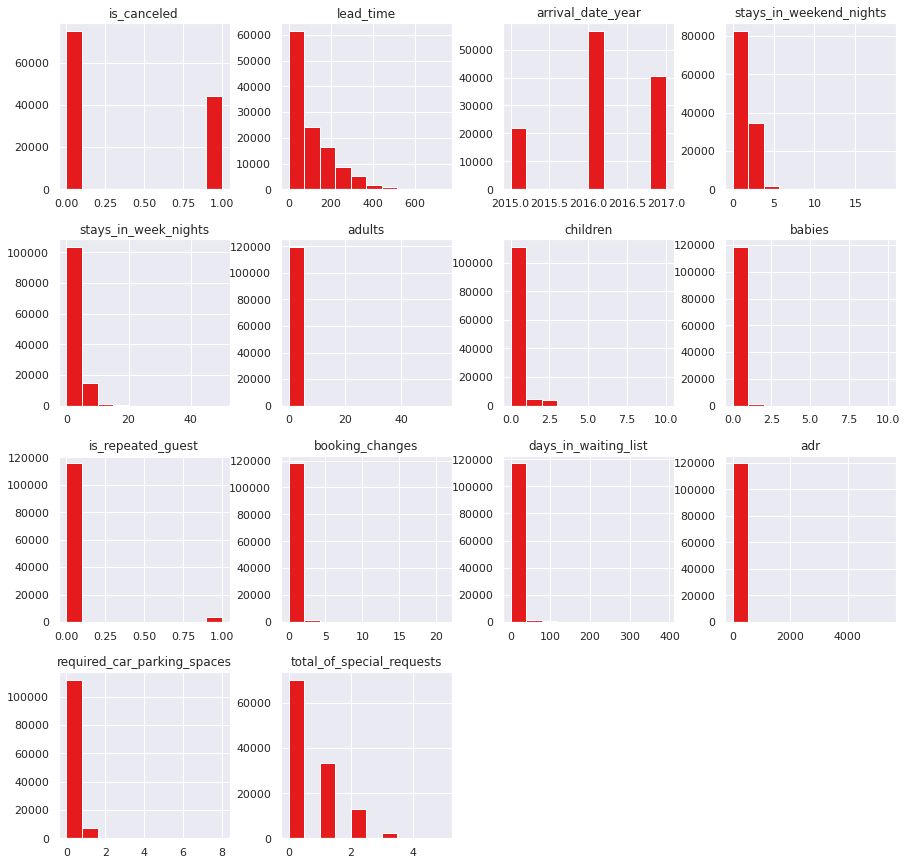

In [ ]:
# Plotting a graph to show a histogram for all the columns in the dataset
df.hist(figsize=(15,15))
plt.show()

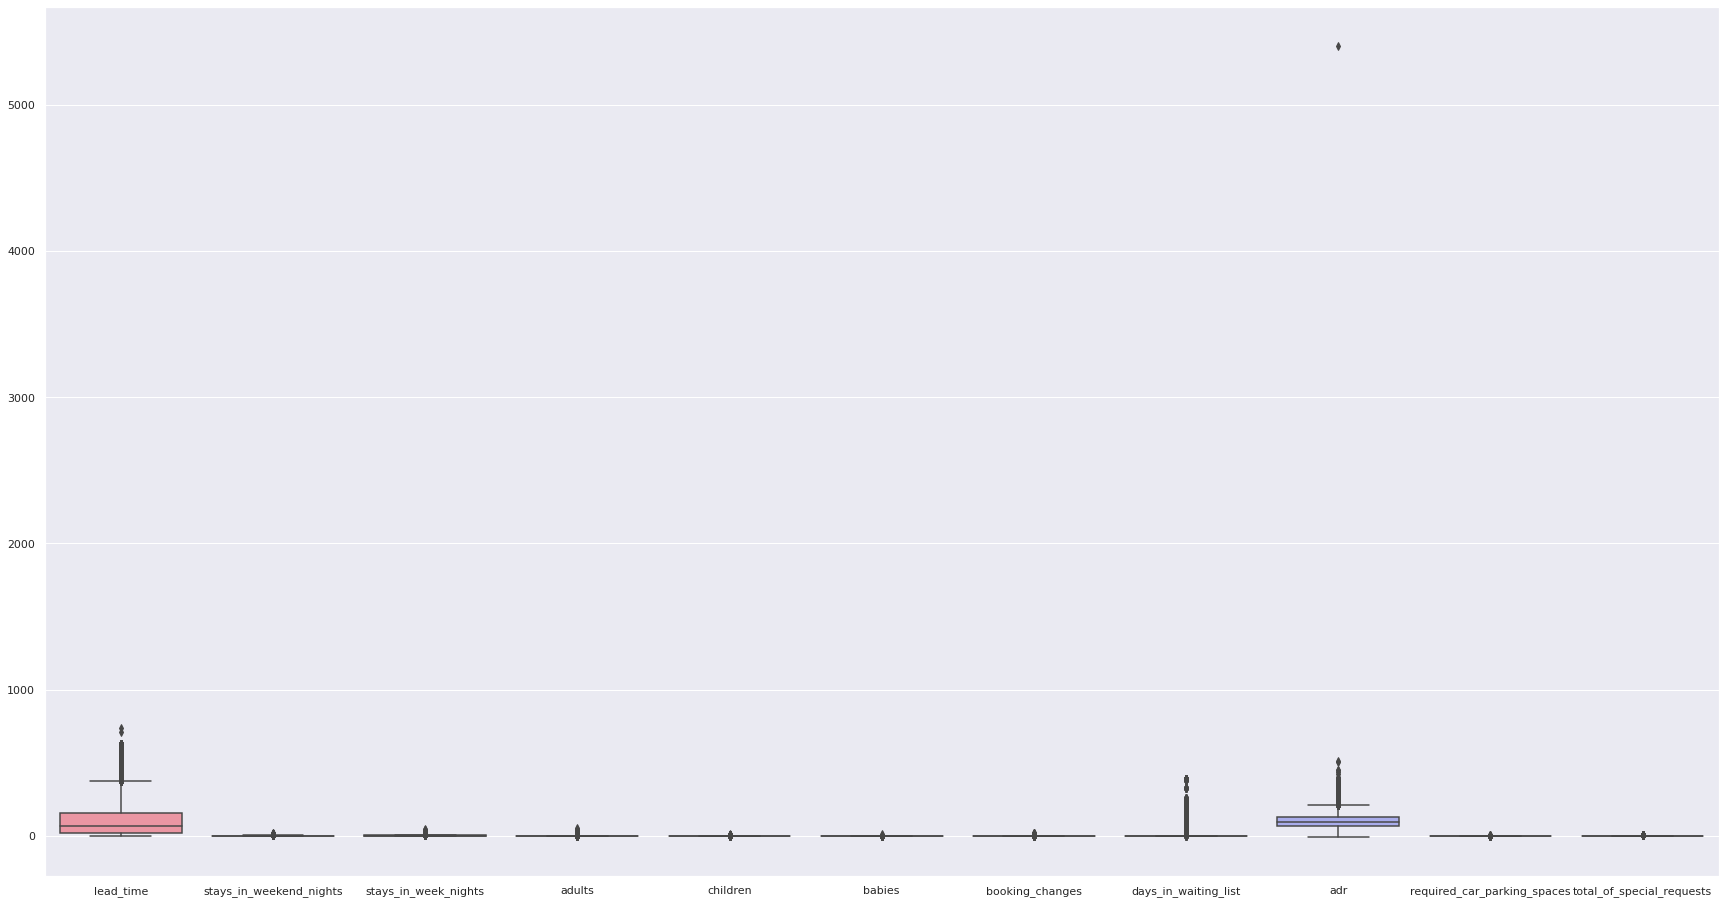

In [ ]:
# Plotting a boxplot to find out the outliers in each column
plt.figure(figsize=(30,16))
sns.boxplot(data=df[['lead_time','stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']])
plt.show()

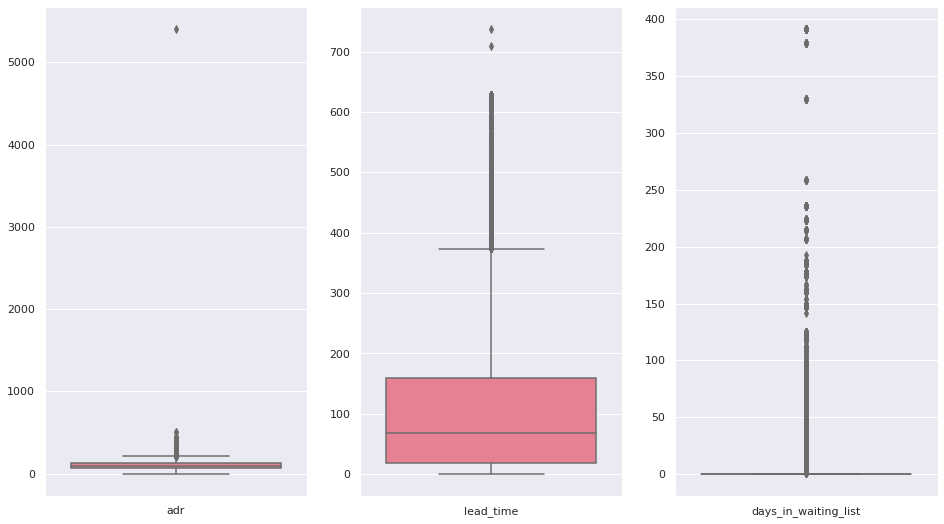

In [ ]:
fig, axes=plt.subplots(1,3, figsize=(16,9))
sns.set_palette('husl')
ax= sns.boxplot(data=df[['adr']], ax=axes[0])
ax=sns.boxplot(data=df[['lead_time']], ax=axes[1])
ax= sns.boxplot(data=df[['days_in_waiting_list']], ax=axes[2])
plt.show()

### We can see that column 'adr' has a very high outlier and some outliers in other columns too i.e.  'lead time' & 'days in waiting list'.

#**Handling outliers**

In [ ]:
# # First Removing outliers by defining threshold based on common understanding
new_df = df.copy()

new_df.loc[new_df.stays_in_weekend_nights > 5,'stays_in_weekend_nights'] = 5
new_df.loc[new_df.stays_in_week_nights > 10,'stays_in_week_nights'] = 10
new_df.loc[new_df.adults > 4,'adults'] = 4
new_df.loc[new_df.children > 3,'children'] = 3
new_df.loc[new_df.babies > 3,'babies'] = 3
new_df.loc[new_df.required_car_parking_spaces > 3,'required_car_parking_spaces'] = 3
new_df.loc[new_df.booking_changes > 5,'booking_changes'] = 5

In [ ]:
# Removing outliers by standard methods and Plotting graphs:
for col in ['lead_time','days_in_waiting_list']:
  # Using IQR method and capping to define the range of inliners:
  lower_cap, q1, q3, upper_cap, median = df[col].quantile([0.01,0.25,0.75,0.99,0.5])
  lower_limit = q1 - 1.5*(q3-q1)
  upper_limit = q3 + 1.5*(q3-q1)

  # Replacing Outliers with median value and Capping
  new_df[col] = np.where(new_df[col] > upper_limit, median,np.where(
                         new_df[col] < lower_limit,median,np.where(
                         new_df[col] < lower_cap,lower_cap,np.where(
                         new_df[col] > upper_cap,upper_cap,new_df[col]))))

In [ ]:
# Removing outliers in adr column
new_df.drop(new_df[new_df['adr'] > 5000].index, inplace = True)
new_df.drop(new_df[new_df['adr'] <= 0].index, inplace = True)

In [ ]:
# Some columns have numeric values but those are actually categorical
categorical_features=["hotel","arrival_date_month","meal","country","market_segment","is_canceled",
                      "distribution_channel","reserved_room_type","assigned_room_type","deposit_type",
                      "customer_type","reservation_status","is_repeated_guest",'same_room',
                      'arrival_date_year']

numeric_features = [i for i in df.columns if i not in categorical_features]
print(numeric_features)

['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

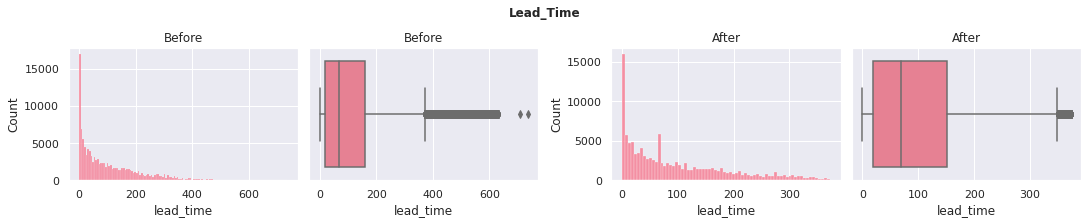

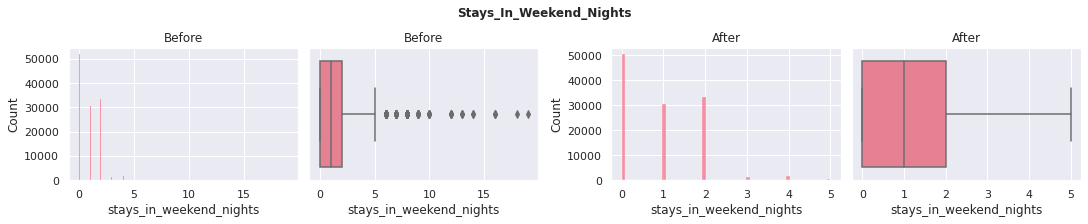

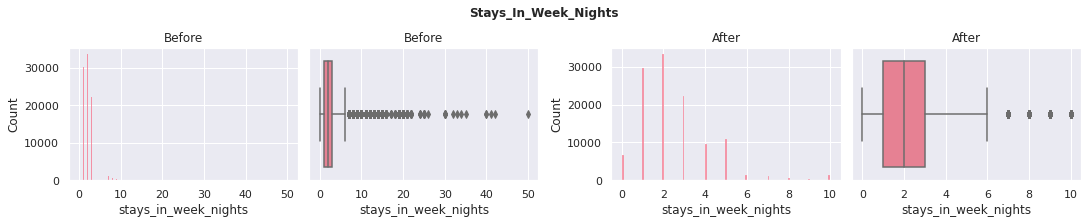

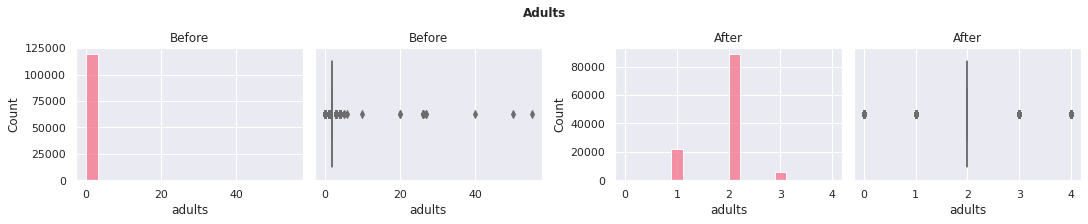

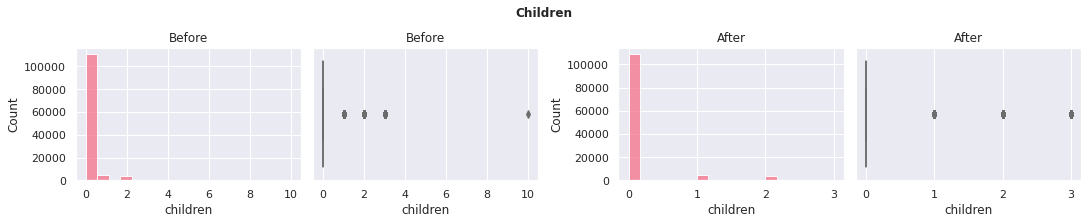

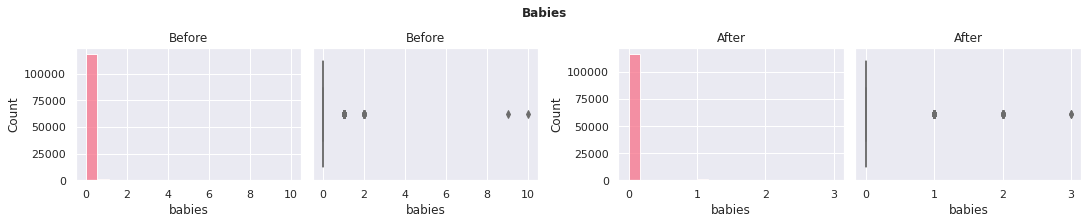

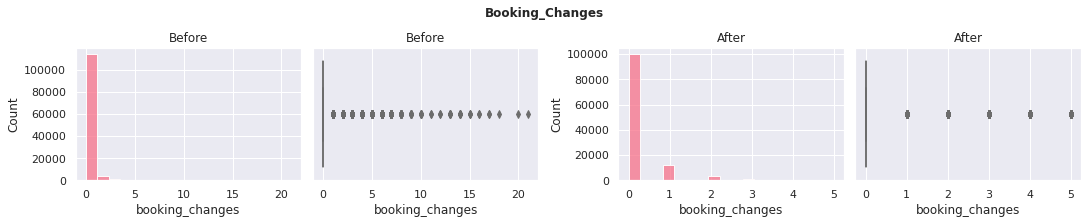

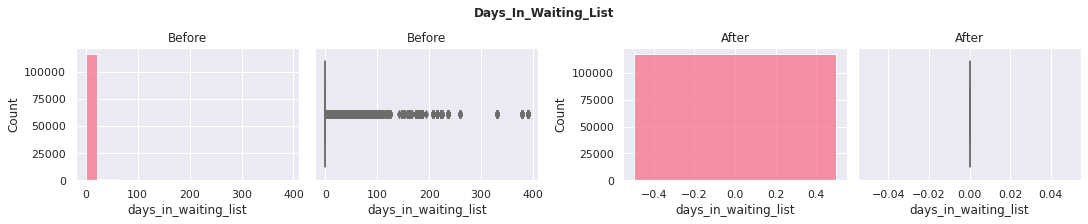

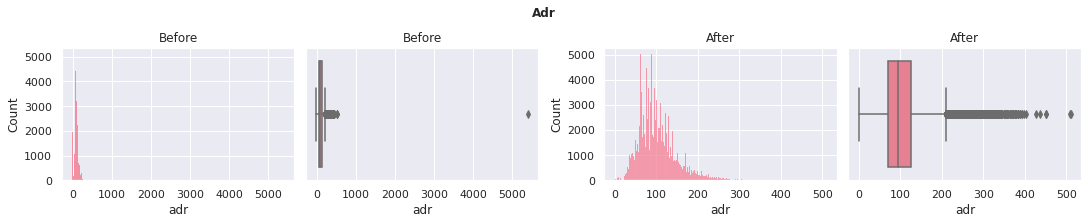

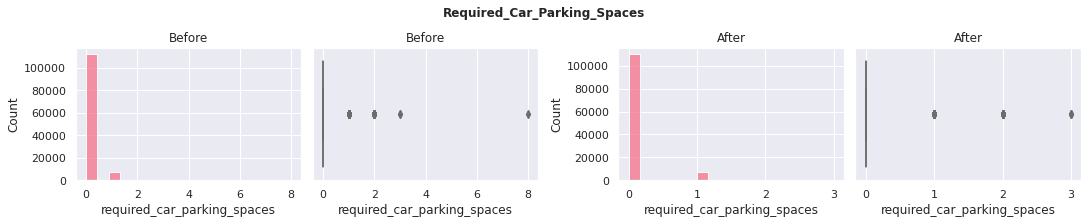

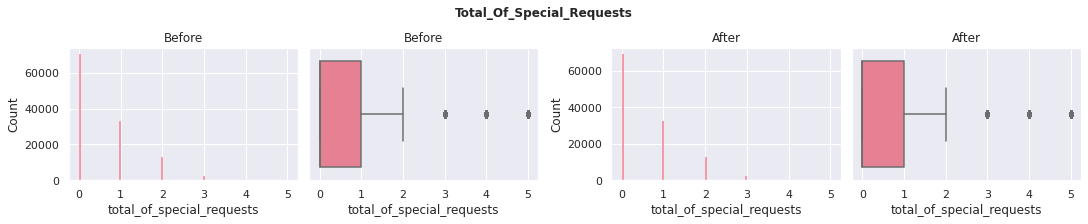

In [ ]:
#Plotting Graphs Before treating outliers 
for col in numeric_features:
  fig, ax =plt.subplots(1,4, constrained_layout=True)
  fig.set_size_inches(15, 3)
  sns.histplot(df[col], ax=ax[0]).set(title="Before")
  sns.boxplot(df[col], ax=ax[1]).set(title="Before")

# After treating outliers
  sns.histplot(new_df[col], ax=ax[2]).set(title="After")
  sns.boxplot(new_df[col], ax=ax[3]).set(title="After")
  plt.suptitle(f'{col.title()}',weight='bold')
  fig.show()

### Now we will do Data manipulation to use our data for some other useful insigts

##**Data Manipulation**

In [ ]:
# Making a new column 'kids' joining two columns i.e 'babies' and 'children'.
new_df['kids']=new_df['babies'] + new_df['children']

In [ ]:
# Making a new column 'total stays' by adding two columns 'stays_in_week_nights' and 'stays_in_weekend_nights'.
new_df['total_stays']=new_df['stays_in_week_nights']+new_df['stays_in_weekend_nights']

In [ ]:
# Making a new column actual guest based on no cancellation
actual_guests = new_df.loc[new_df["is_canceled"] == 0]
# Now creating a new column revenue by multiply adr with total stays
actual_guests['revenue'] = (actual_guests['adr'] * (actual_guests['total_stays']))/1000000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
new_df['guest']= new_df['adults']+new_df['children']+new_df['babies']
new_df['guest'] = new_df.guest.map( lambda x: 'Single' if x == 1 else 'Family')
new_df['kids_count'] = new_df.kids.map( lambda x: 'no_kids' if x == 0 else 'kids')

Removing null values in the new columns that are not required for our study

In [ ]:
# Removing adult count=0 as it is not relevent for our study
new_df.drop(new_df[new_df['adults'] == 0].index, inplace = True)
# Removing total stays=0 as it is not relevent for our study
new_df.drop(new_df[new_df['total_stays'] == 0].index, inplace = True)
# Removing assigned room type=0 as it is not relevent for our study
new_df.drop(new_df[new_df['assigned_room_type'] == 0].index, inplace = True)